# <b><center>Análisis Exploratorio de los Datos</b></center>

**Conjunto de datos de Predicción del Riesgo de Hipertensión**

*Este conjunto de datos sintético pero realista está diseñado para ayudar a investigadores, científicos de datos y entusiastas de la salud a analizar los factores de riesgo asociados a la hipertensión (presión arterial alta). Contiene 1.985 registros y 11 características significativas generadas a partir de conocimientos clínicos y patrones de datos de salud pública.*

- **Age**: Edad del paciente (en años)
- **Salt_Intake**: Consumo diario de sal (en gramos) - uno de los principales factores que contribuyen a la hipertensión arterial
- **Stress_Score**: Escala de 0-10 que mide el nivel de estrés psicológico
- **BP_History**: Estado anterior de la presión arterial: Normal, Prehipertensión, Hipertensión
- **Sleep_Duration**: Promedio de horas de sueño al día
- **BMI**: Índice de masa corporal (medida de la obesidad basada en el peso/altura)
- **Medication**: Tipo de medicación: Ninguno, Betabloqueante, Diurético, Inhibidor de la ECA, Otro
- **Family_History**: Historia familiar de hipertensión: Sí / No
- **Exercise_Level**: Nivel de actividad física: Bajo, Moderado, Alto
- **Smoking_Status**: Si el paciente es fumador o no fumador
- **Has_Hypertension**: Variable objetivo: Indica la presencia de hipertensión (Sí/No)

## **Librerías**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

## **Datos**

In [3]:
df = pd.read_csv('../0_data/hypertension_dataset.csv')
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


## **Tipos de Datos**

In [4]:
df.dtypes

Age                   int64
Salt_Intake         float64
Stress_Score          int64
BP_History           object
Sleep_Duration      float64
BMI                 float64
Medication           object
Family_History       object
Exercise_Level       object
Smoking_Status       object
Has_Hypertension     object
dtype: object

Los datos deben colocarse en formato adecuado, cambiar los object por categorical y los int64 por float64.

## **Valores Nulos**

In [5]:
df.isna().sum()

Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64

Solo medicación tiene valores nulos, se debe diferenciar si esos valores son dado porque las personas no se medican, al ser un numero considerable no se eliminaran

## **Análisis Descriptivos**

### Datos Cuantitativos

In [6]:
df.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


Podemos ver que la variable más dispersa es la de *Strees_Score* y la que menos dispersdión tiene es la de *Sleep_Duration*, viendo estos datos será necesario una estandarización de los datos.

### Datos Cualitativos

In [7]:
df.describe(include=['object'])

,BP_History,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
count,1985,1186,1985,1985,1985,1985
unique,3,4,2,3,2,2
top,Normal,Beta Blocker,No,Low,Non-Smoker,Yes
freq,796,412,1000,936,1417,1032


En los datos tenemos que la mayoría de ellos tienen un historial anterior de la presión arterial en *Normal*, la medicación más usada es *Beta Blocker*, el historial familiar de tener hipertención es *No*, el nivel de ejercicio es de *Low*, el estados de fumador es de *Non-Smoker* y la mayor parte de ellos tiene hipertensión.

## **Análisis Inferencial**

### Datos Cuantitativos

In [8]:
df_numerico = df.select_dtypes(include=['float64', 'int64']).columns

for i in df_numerico:
    stat, p = shapiro(df[i])
    if p < 0.05:
        res = 'Se rechaza'
    else:
        res = 'No se rechaza'
    print(f'Variable: {i} | Estadístico: {stat} | P-valor: {p} | {res} la H0')

Variable: Age | Estadístico: 0.9528587316597226 | P-valor: 8.476822953691877e-25 | Se rechaza la H0
Variable: Salt_Intake | Estadístico: 0.9991122093878423 | P-valor: 0.4547340639439232 | No se rechaza la H0
Variable: Stress_Score | Estadístico: 0.9390180675264523 | P-valor: 8.022837677574015e-28 | Se rechaza la H0
Variable: Sleep_Duration | Estadístico: 0.9989148243096209 | P-valor: 0.26622888090860736 | No se rechaza la H0
Variable: BMI | Estadístico: 0.9994453066490963 | P-valor: 0.8604507365925207 | No se rechaza la H0


En estos datos solo presentan normalidad **Salt_Intake**, **Sleep_Duration** y **BMI**, se podría evaluar usar una transformación de la z-score, y para las otras variables otros tipos de transformación.

### Datos Cualitativos

In [9]:
df_cuali = df.select_dtypes(include=['object']).columns

def prueba_proporciones_iguales(col, nombre_columna):
    frecuencias_obs = col.value_counts().sort_index()
    k = len(frecuencias_obs)
    total = frecuencias_obs.sum()
    frecuencias_esp = [total / k] * k
    stat, p = chisquare(f_obs=frecuencias_obs, f_exp=frecuencias_esp)

    resultado = (
        f"{nombre_columna}: "
        f"Estadístico Chi² = {stat:.4f} | p-valor = {p:.4f} → "
        + ("Se rechaza H₀: proporciones distintas" if p < 0.05 else "No se rechaza H₀: proporciones iguales")
    )
    print(resultado)

for i in df_cuali:
    prueba_proporciones_iguales(df[i], i)

BP_History: Estadístico Chi² = 42.8746 | p-valor = 0.0000 → Se rechaza H₀: proporciones distintas
Medication: Estadístico Chi² = 83.9292 | p-valor = 0.0000 → Se rechaza H₀: proporciones distintas
Family_History: Estadístico Chi² = 0.1134 | p-valor = 0.7364 → No se rechaza H₀: proporciones iguales
Exercise_Level: Estadístico Chi² = 224.4826 | p-valor = 0.0000 → Se rechaza H₀: proporciones distintas
Smoking_Status: Estadístico Chi² = 363.1239 | p-valor = 0.0000 → Se rechaza H₀: proporciones distintas
Has_Hypertension: Estadístico Chi² = 3.1441 | p-valor = 0.0762 → No se rechaza H₀: proporciones iguales


En las siguientes variables no hay una diferencia significativa de las proporciones de las clases, osea no se tiene información como para decir que una clase predomina sobre la otra: **Family_History** y **Has_Hypertension**.

## **Relación con el Target**

### Cuantitativas

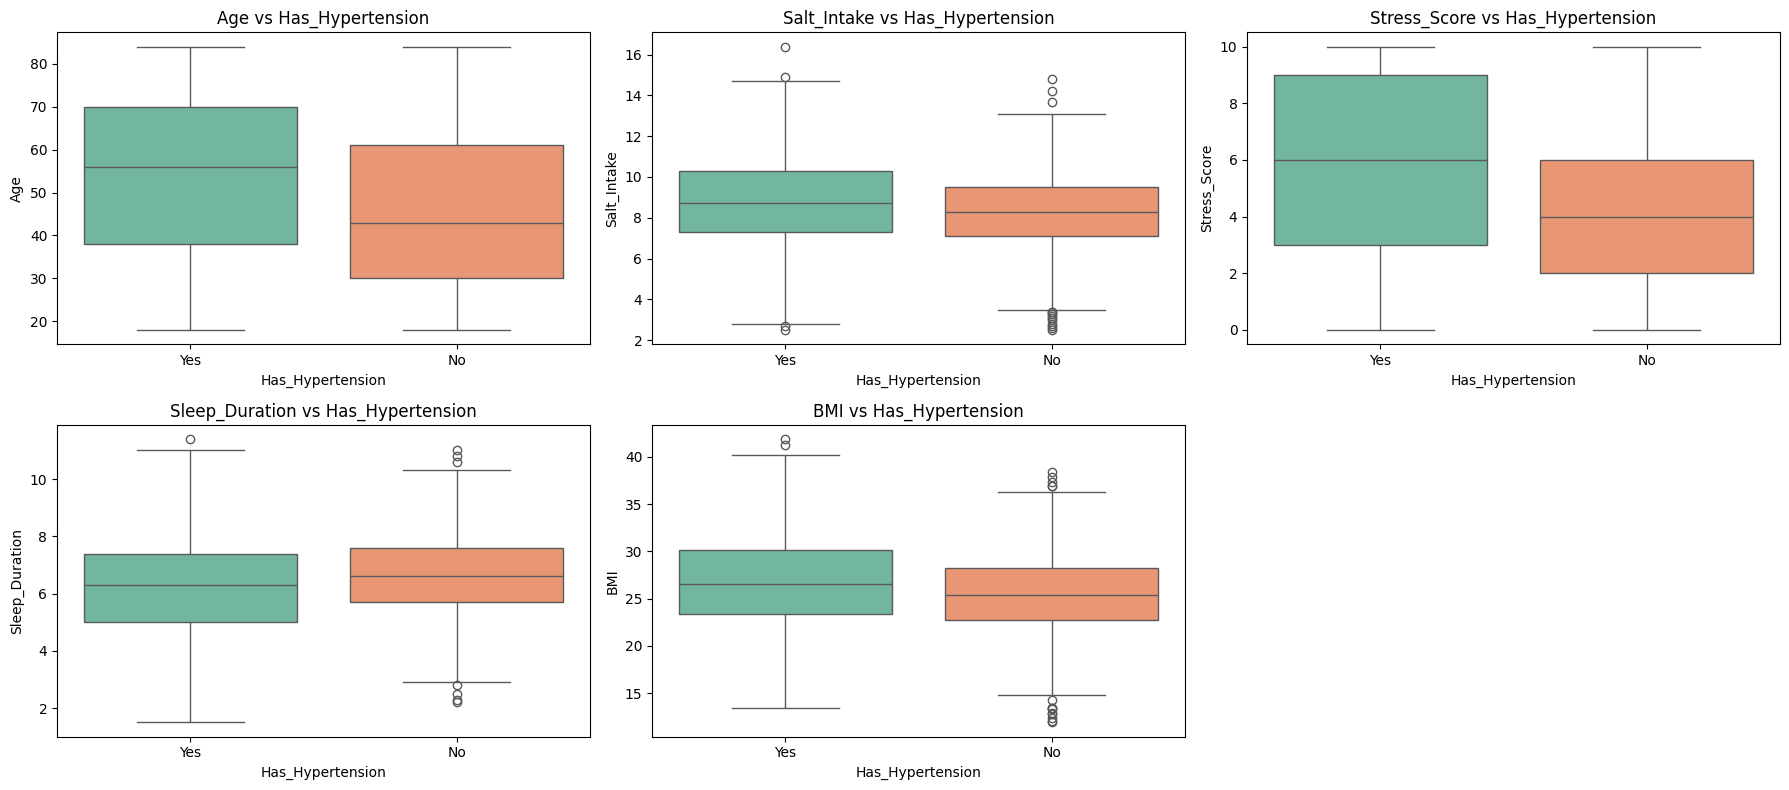

In [10]:
def boxplots_vs_target(df, target='Has_Hypertension'):
    df_numericas = df.select_dtypes(include=['int64', 'float64']).copy()
    if target not in df_numericas.columns:
        df_numericas[target] = df[target]
    columnas = [col for col in df_numericas.columns if col != target]
    n = len(columnas)
    ncols = 3
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 4))
    axes = axes.flatten()
    for i, col in enumerate(columnas):
        sns.boxplot(x=target, y=col, data=df_numericas, hue=target, palette='Set2', ax=axes[i])
        axes[i].set_title(f'{col} vs {target}')
        # Solo eliminar leyenda si existe
        if axes[i].legend_ is not None:
            axes[i].legend_.remove()
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

boxplots_vs_target(df, target='Has_Hypertension')

Aqui las variables que más representan una diferencia entre una persona que tiene hipertensió o no son la de **Age** y **Stress_Score**.

### Cualitativas

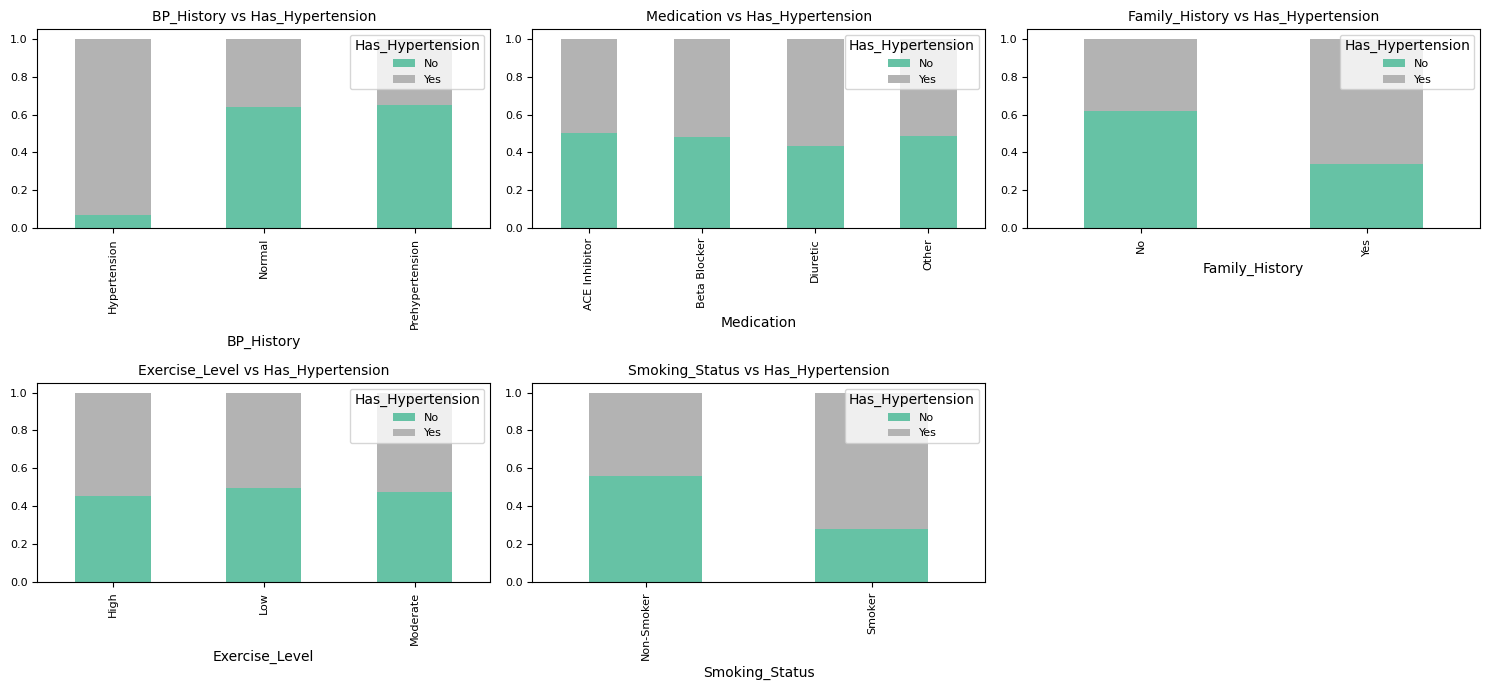

In [11]:
def catplots_vs_target(df, target='Has_Hypertension'):
    cat_cols = df.select_dtypes(include='object').columns
    cat_cols = [col for col in cat_cols if col != target]
    n = len(cat_cols)
    ncols = 3
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 3.5))
    axes = axes.flatten()
    for i, col in enumerate(cat_cols):
        if col == target:
            continue
        conteo = df.groupby([col, target]).size()
        total_por_categoria = conteo.groupby(level=0).sum()
        proporciones = conteo / total_por_categoria
        prop_df = proporciones.unstack(fill_value=0)
        prop_df.index.name = None
        prop_df.index = prop_df.index.map(str)
        prop_df.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2')
        axes[i].set_title(f'{col} vs {target}', fontsize=10)
        axes[i].legend(title=target, fontsize=8)
        axes[i].tick_params(labelsize=8)
        axes[i].set_xlabel(col)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

catplots_vs_target(df, target='Has_Hypertension')

En estos patrones podemos decir que si el paciente en el historial anterior a tenido hipertención es muy probable que lo tenga ahora, por otro lado si tiene familiares con hipertensión también es probable que el lo tenga, adicional a ello, si el paciente es fumador tambien es más probabkle que tenga hipertensión.

## **Pruebas Estadísticas con Target**

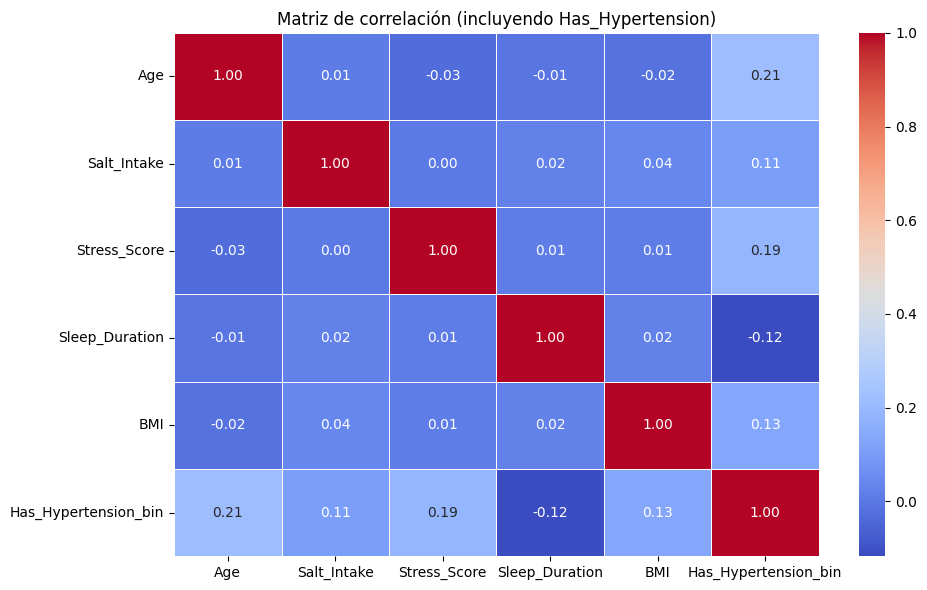

In [12]:
df["Has_Hypertension_bin"] = df["Has_Hypertension"].map({"Yes": 1, "No": 0})
numericas = df.select_dtypes(include=["float64", "int64"]).copy()
corr_matrix = numericas.corr(method="spearman")

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación (incluyendo Has_Hypertension)")
plt.tight_layout()
plt.show()

Las variables no tienen una correlación significativa entre ellas, pero sí con el target, todas aportan una relación con ella, lo que indicaría que aportan información explicativa y predictiva para la variable objetivo.

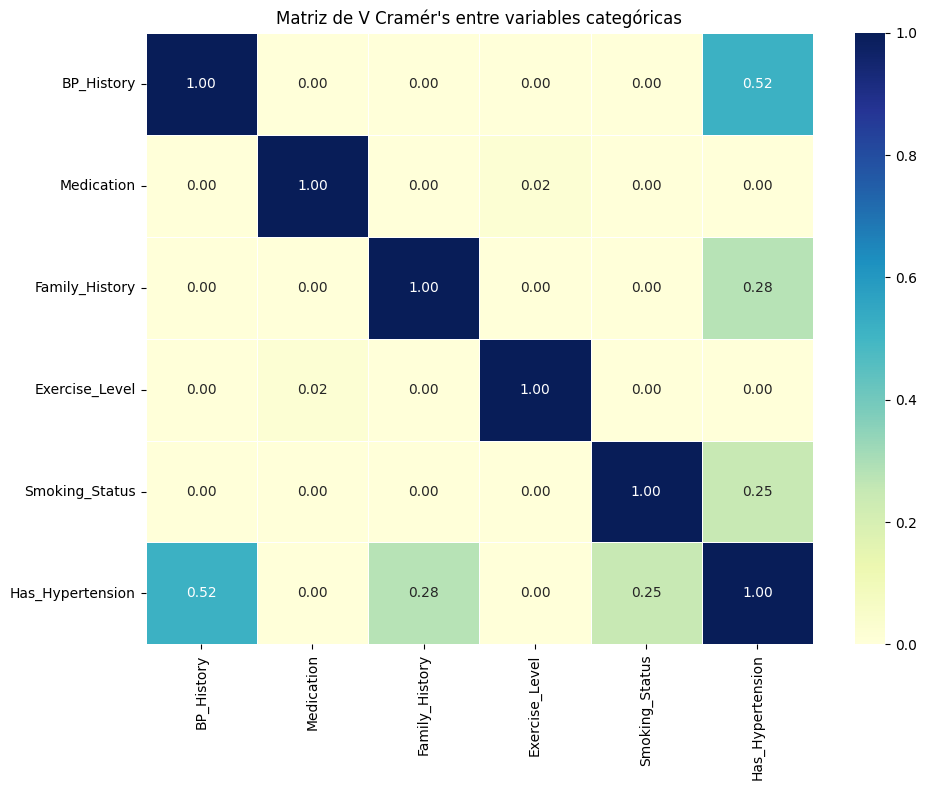

In [13]:
def cramers_v(x, y):
    tabla = pd.crosstab(x, y)
    chi2 = chi2_contingency(tabla)[0]
    n = tabla.sum().sum()
    phi2 = chi2 / n
    r, k = tabla.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categoricas = df.select_dtypes(include="object")
cols = categoricas.columns
matriz_cramer = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)
for col1 in cols:
    for col2 in cols:
        if col1 == col2:
            matriz_cramer.loc[col1, col2] = 1.0
        else:
            matriz_cramer.loc[col1, col2] = cramers_v(categoricas[col1], categoricas[col2])
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_cramer, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Matriz de V Cramér's entre variables categóricas")
plt.tight_layout()
plt.show()

Aquí tenemos los que ya habiamos visto en los graficos con el target, la variables que generasn una relación directa y fuerte con el target es **BP_History**, **Family_History** y **Smoking_Status**.